In [24]:
import numpy as np
import pandas as pd
df=pd.read_csv('sms_spam_extended_2000.csv')
df.head()

,word_freq_free,word_freq_win,word_freq_offer,sms_length,is_spam
0,7,7,11,101,1
1,2,6,3,31,0
2,8,5,9,78,1
3,2,0,10,124,1
4,4,7,4,86,0


In [25]:
df.isnull().sum()

word_freq_free     0
word_freq_win      0
word_freq_offer    0
sms_length         0
is_spam            0
dtype: int64

is_spam
1    1492
0     508
Name: count, dtype: int64


<Axes: xlabel='is_spam', ylabel='count'>

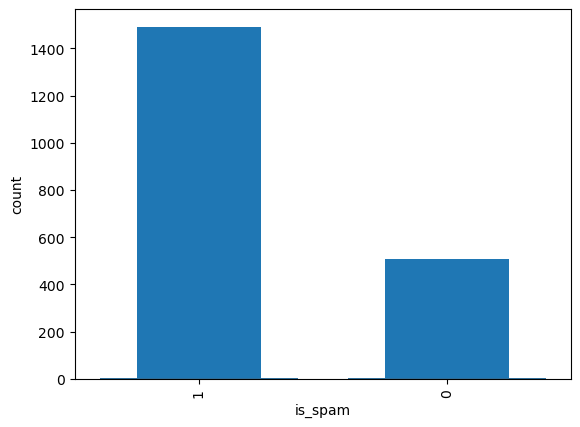

In [26]:
a=df['is_spam'].value_counts()
print(a)
a.plot(kind='bar')
import matplotlib.pyplot as plt
import seaborn as sns   
sns.countplot(df['is_spam'])


In [27]:
b=df.shape
print(b)
c=df.describe()
print(c)


(2000, 5)
       word_freq_free  word_freq_win  word_freq_offer   sms_length  \
count     2000.000000    2000.000000      2000.000000  2000.000000   
mean         4.315000       3.421000         5.611000    89.560000   
std          2.938723       2.244165         3.352506    40.993507   
min          0.000000       0.000000         0.000000    20.000000   
25%          2.000000       2.000000         3.000000    51.000000   
50%          4.000000       3.000000         6.000000    86.000000   
75%          7.000000       5.000000         8.000000   127.000000   
max          9.000000       7.000000        11.000000   159.000000   

           is_spam  
count  2000.000000  
mean      0.746000  
std       0.435406  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000  


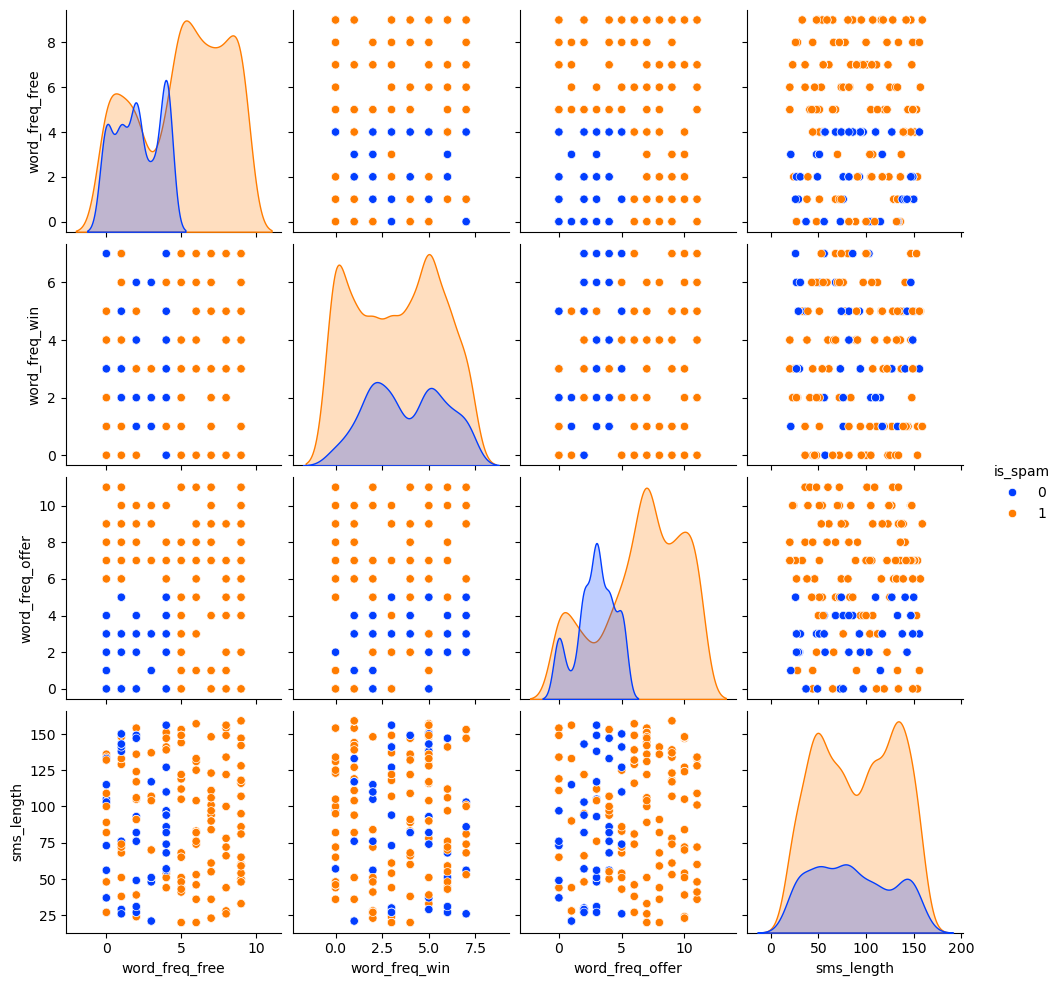

In [28]:
import seaborn as sns
sns.pairplot(df,hue='is_spam',palette='bright')

In [29]:
df.corr()

,word_freq_free,word_freq_win,word_freq_offer,sms_length,is_spam
word_freq_free,1.000000,-0.004872,-0.011167,-0.052587,0.438275
word_freq_win,-0.004872,1.000000,0.044053,-0.008796,-0.098876
word_freq_offer,-0.011167,0.044053,1.000000,0.008567,0.476495
sms_length,-0.052587,-0.008796,0.008567,1.000000,0.063579
is_spam,0.438275,-0.098876,0.476495,0.063579,1.000000


In [30]:
df

,word_freq_free,word_freq_win,word_freq_offer,sms_length,is_spam
0,7,7,11,101,1
1,2,6,3,31,0
2,8,5,9,78,1
3,2,0,10,124,1
4,4,7,4,86,0
...,...,...,...,...,...
1995,0,2,6,27,1
1996,4,5,5,74,0
1997,4,4,4,82,0
1998,1,4,6,38,1


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
X1 = df.drop("is_spam", axis=1)
y = df['is_spam']

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model1 = GaussianNB().fit(X_train, y_train)
print("All features:", accuracy_score(y_test, model1.predict(X_test)))

X2 = df[['word_freq_offer', 'word_freq_free']]
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
model2 = GaussianNB().fit(X_train, y_train)
print("correlated features:", accuracy_score(y_test, model2.predict(X_test)))

All features: 0.945
correlated features: 0.9475


In [32]:
y_pred = model2.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89       107
           1       0.93      1.00      0.97       293

    accuracy                           0.95       400
   macro avg       0.97      0.90      0.93       400
weighted avg       0.95      0.95      0.95       400



In [33]:
import pickle

In [35]:
with open("spam_model.sav", "wb") as f:
    pickle.dump(model2, f)

In [36]:
with open("spam_model.sav", "rb") as f:
    loaded_model = pickle.load(f)